## 📌 **Markdown Explanation: Code Breakdown**  

### **🔹 What’s Happening in This Code?**  
1. **Importing Pandas:**  
   - The script starts by importing the `pandas` library, which is essential for handling structured data in Python.  

2. **Loading the Dataset:**  
   - The dataset is read from a CSV file using `pd.read_csv(file_path)`.  
   - The file path (`file_path`) points to the dataset stored locally on the user's computer.  

3. **Checking Data Integrity:**  
   - `df.info()` is used to display a summary of the dataset.  
   - This includes:
     - The number of **columns and rows** (data shape).  
     - The **column names and their data types** (e.g., integers, floats, objects).  
     - Whether there are any **missing values** in the dataset.  

### **💡 Why Is This Important?**  
✅ Ensures that the dataset is **loaded correctly**.  
✅ Helps identify **missing values or incorrect data types** early in the analysis.  
✅ Allows for **further cleaning and processing** before applying models or visualizations.  


In [135]:
import pandas as pd

# Use the correct filename (check spaces and underscores)
file_path = r"C:\LAB_TASKS\Data_Science\project\Womens Clothing Reviews.csv"  # Corrected name
df = pd.read_csv(file_path)

# Check if the data loaded correctly
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              10000 non-null  int64 
 1   Age                      10000 non-null  int64 
 2   Title                    8360 non-null   object
 3   Rating                   10000 non-null  int64 
 4   Recommended IND          10000 non-null  int64 
 5   Positive Feedback Count  10000 non-null  int64 
 6   Division Name            9999 non-null   object
 7   Department Name          9999 non-null   object
 8   Class Name               9999 non-null   object
dtypes: int64(5), object(4)
memory usage: 703.3+ KB
None


## 🛠 **Handling Missing Values in the Dataset**  

### **🔹 What’s Happening in This Code?**  

1. **Removing Missing Values:**  
   - `df.dropna(inplace=True)` removes any rows that contain **missing (NaN) values** from the dataset.  
   - The `inplace=True` ensures that changes are applied directly to `df` without needing reassignment.  

2. **Verifying Missing Values:**  
   - `df.isnull().sum()` checks if any **missing values** remain in each column.  
   - The `print()` statement displays the count of missing values for each column.  

### **💡 Why Is This Important?**  
✅ Ensures **data completeness** before further analysis.  
✅ Helps prevent **errors** when applying models or visualizations.  
✅ Improves the **accuracy and reliability** of insights derived from the data.  


In [136]:
# Handle missing values (if any still exist)
df.dropna(inplace=True)

# Verify if any missing values remain
print(df.isnull().sum())


Clothing ID                0
Age                        0
Title                      0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


## 🔍 **Text Preprocessing for NLP Analysis**  

### **📌 What’s Happening in This Code?**  

1. **Importing Required Libraries:**  
   - `re`: Used for **regular expressions** to clean text.  
   - `nltk`: Library for **natural language processing (NLP)** tasks.  
   - `stopwords` & `WordNetLemmatizer`: Helps in **removing common words** and **normalizing words** to their base forms.  

2. **Downloading NLTK Data (Only Once):**  
   - `nltk.download('stopwords')`: Downloads **common English stopwords**.  
   - `nltk.download('wordnet')`: Downloads the **WordNet Lemmatizer dataset**.  

3. **Initializing Stopwords & Lemmatizer:**  
   - `stop_words = set(stopwords.words('english'))`: Loads stopwords into a set for **faster lookup**.  
   - `lemmatizer = WordNetLemmatizer()`: Creates an instance for **word lemmatization** (converting words to their root form).  

4. **Preprocessing Function: `preprocess_text(text)`**  
   - **Handles Missing Values:** Returns an **empty string** if the input is `None` or empty.  
   - **Removes Punctuation:** Uses `re.sub(r'[^\w\s]', '', text)` to clean **special characters**.  
   - **Converts to Lowercase:** Ensures uniform text case.  
   - **Removes Stopwords & Lemmatizes Words:**  
     - Splits the text into words.  
     - Removes words found in **stop_words**.  
     - Converts each word to its **lemmatized form**.  
   - **Returns the cleaned text.**  

### **✨ Why Is This Important?**  
✅ **Enhances text quality** for sentiment analysis & machine learning models.  
✅ **Reduces data noise** by removing unnecessary words.  
✅ **Standardizes words** to improve feature extraction.  


In [137]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK datasets (only needed once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str) or text.strip() == "":  # Handle None or empty strings
        return ""
    
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])  # Lemmatization & remove stopwords
    
    return text


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     UNEXPECTED_EOF_WHILE_READING] EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1006)>


In [138]:
import pandas as pd

df = pd.read_csv("C:\LAB_TASKS\Data_Science\project\Womens Clothing Reviews.csv")  # Replace with your actual file path
print(df.head())  # Verify it's loaded

# List of selected columns
selected_columns = [
    "Clothing ID", "Age", "Title", "Rating", 
    "Recommended IND", "Positive Feedback Count", 
    "Division Name", "Department Name", "Class Name"
]

# Get unique counts for selected columns
unique_counts = df[selected_columns].nunique()

# Display results
print("🔹 Total Unique Values for Selected Columns:\n")
for col, count in unique_counts.items():
    print(f"{col}: {count}")


   Clothing ID  Age                    Title  Rating  Recommended IND  \
0          767   33                      NaN       4                1   
1         1080   34                      NaN       5                1   
2         1077   60  Some major design flaws       3                0   
3         1049   50         My favorite buy!       5                1   
4          847   47         Flattering shirt       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
🔹 Total Unique Values for Selected Columns:

Clothing ID: 613
Age: 75
Title: 6433
Rating: 5
Recommended IND: 2
Positive Feedback 

## 📊 **TF-IDF Feature Extraction for Sentiment Analysis**  

### **📌 What’s Happening in This Code?**  

1. **Preprocessing the 'Title' Column:**  
   - `df['Title'].fillna("").apply(preprocess_text)`:  
     - **Handles missing values** by replacing `NaN` with an empty string (`""`).  
     - **Applies text preprocessing** (removing punctuation, stopwords, and lemmatizing).  

2. **Initializing TF-IDF Vectorizer:**  
   - `TfidfVectorizer(max_features=5000)`:  
     - Converts text data into numerical features.  
     - Uses **Term Frequency-Inverse Document Frequency (TF-IDF)** to measure word importance.  
     - Restricts the vocabulary to the **top 5000 most important words**.  

3. **Transforming the 'Title' Column:**  
   - `X = tfidf.fit_transform(df['Title']).toarray()`:  
     - Converts the cleaned **'Title' column** into a **numerical TF-IDF matrix**.  
     - Outputs a **2D NumPy array (`X`)** for machine learning models.  

4. **Defining the Target Variable (`y`):**  
   - `y = df['Rating'].apply(lambda x: 1 if x > 3 else 0)`:  
     - Converts **ratings** into **binary sentiment labels**:  
       - **1 (Positive)** for ratings **above 3**.  
       - **0 (Negative)** for ratings **3 or below**.  

### **✨ Why Is This Important?**  
✅ **TF-IDF helps capture important words** without common but uninformative words.  
✅ **Converts text into numerical data** for machine learning models.  
✅ **Creates a structured dataset** for sentiment classification.  


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure the text column is preprocessed
df['Title'] = df['Title'].fillna("").apply(preprocess_text)  # Fill missing & preprocess

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Apply TF-IDF transformation to the 'Title' column
X = tfidf.fit_transform(df['Title']).toarray()

# Define the target variable (Sentiment)
y = df['Rating'].apply(lambda x: 1 if x > 3 else 0)  # 1 = Positive, 0 = Negative


## 🏗 **Splitting Data for Model Training and Testing**  

### **📌 What’s Happening in This Code?**  

1. **Importing Train-Test Split Function:**  
   - `from sklearn.model_selection import train_test_split`  
   - This function is used to split data into **training** and **testing** sets.  

2. **Splitting the Data:**  
   - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`  
   - **80% of the data** is assigned for **training** (`X_train`, `y_train`).  
   - **20% of the data** is reserved for **testing** (`X_test`, `y_test`).  
   - `random_state=42` ensures **consistent and reproducible** results.  

### **✨ Why Is This Important?**  
✅ **Prepares data for machine learning** by separating training and testing sets.  
✅ **Prevents overfitting** by testing model performance on unseen data.  
✅ **Ensures reproducibility** with a fixed random state.  


In [140]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 **Training Different Machine Learning Models**  

### **📌 What’s Happening in This Code?**  

1. **Importing Classification Models:**  
   - `LogisticRegression` (Linear classifier)  
   - `SVC` (Support Vector Machine for classification)  
   - `RandomForestClassifier` (Ensemble learning method)  

2. **Training the Models:**  

   - **Logistic Regression:**  
     - `max_iter=1000` ensures enough iterations to converge.  
   
   - **Support Vector Machine (SVM):**  
     - Uses a `linear` kernel for better efficiency in text classification.  
   
   - **Random Forest:**  
     - `n_estimators=100` sets the number of decision trees.  
     - `random_state=42` ensures reproducibility.  

### **✨ Why Is This Important?**  
✅ **Compares multiple models** to find the best performer.  
✅ **Handles different types of data** and complexity levels.  
✅ **Avoids overfitting** by using ensemble learning (Random Forest).  


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)  # Increased iterations to avoid convergence warnings
lr_model.fit(X_train, y_train)

# Support Vector Machine Model (Linear Kernel for efficiency)
svm_model = SVC(kernel='linear')  # Linear kernel speeds up training for text classification
svm_model.fit(X_train, y_train)

# Random Forest Model (Explicitly setting number of trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📊 **Evaluating Model Performance**  

### **🔍 What’s Happening in This Code?**  

1. **Predictions for Each Model:**  
   - Uses `.predict(X_test)` to generate predictions on unseen data.  

2. **Performance Metrics Used:**  
   - **Accuracy Score:** Measures overall correctness.  
   - **Classification Report:** Shows precision, recall, and F1-score for each class.  
   - **Confusion Matrix:** Displays true/false positives & negatives for error analysis.  

### **📌 Why This Matters?**  
✅ **Compares different models** to determine the best-performing one.  
✅ **Identifies weaknesses**, such as high false positives or false negatives.  
✅ **Helps refine models** by adjusting hyperparameters based on insights.  


In [142]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Evaluation
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Support Vector Machine Evaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8175
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.31      0.44       461
           1       0.82      0.97      0.89      1539

    accuracy                           0.82      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.81      0.82      0.79      2000

Logistic Regression Confusion Matrix:
 [[ 144  317]
 [  48 1491]]
SVM Accuracy: 0.8245
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.38      0.50       461
           1       0.84      0.96      0.89      1539

    accuracy                           0.82      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.81      0.82      0.80      2000

SVM Confusion Matrix:
 [[ 176  285]
 [  66 1473]]
Random Forest Accuracy: 0.823
Random Forest Classification Report:
               precision    recal

## 📊 **Visualizing Outliers in Age & Ratings**  

### **🔍 What’s Happening in This Code?**  

1. **Boxplot for Age:**  
   - Helps detect extreme values (outliers) in customer ages.  
   - Shows distribution and potential anomalies.  

2. **Boxplot for Ratings:**  
   - Reveals if product ratings have unusual values.  
   - Helps in identifying inconsistencies in user feedback.  

### **📌 Why This Matters?**  
✅ **Identifies anomalies** that might affect model performance.  
✅ **Ensures data quality** before analysis.  
✅ **Guides preprocessing decisions** like handling extreme values.  


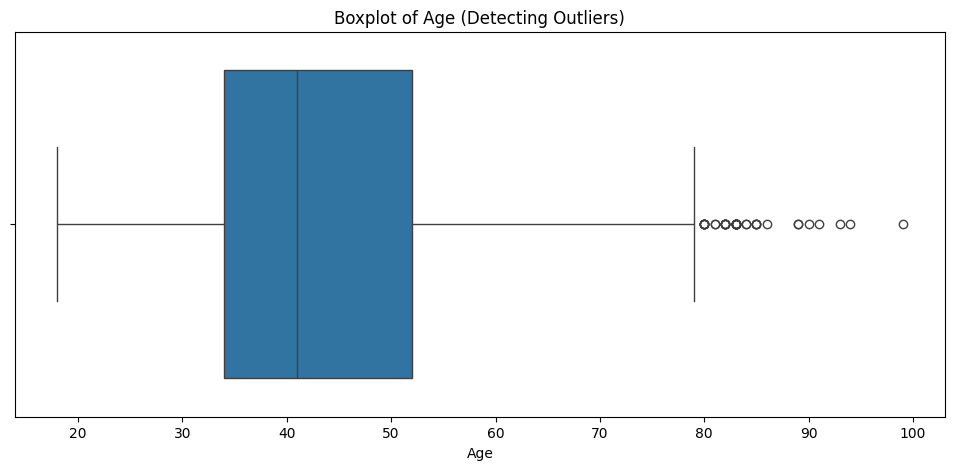

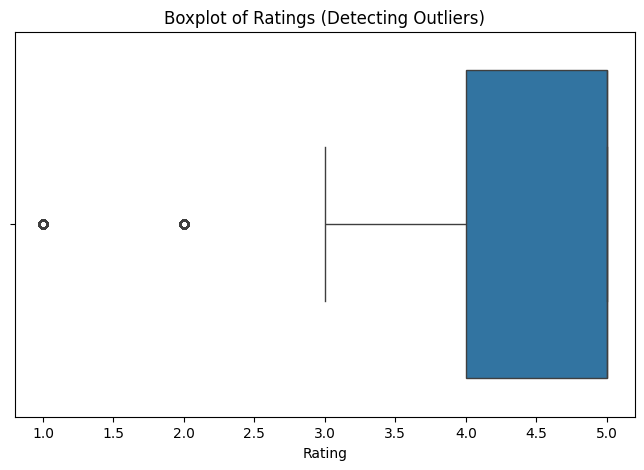

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (Detecting Outliers)")
plt.show()

# Boxplot for Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Rating'])
plt.title("Boxplot of Ratings (Detecting Outliers)")
plt.show()


## 🔍 **Handling Outliers in Age & Ratings**  

### **🛠 What’s Happening in This Code?**  

1. **Removing Outliers in Age:**  
   - Uses **Interquartile Range (IQR)** method.  
   - Identifies outliers beyond **1.5 times** the IQR.  
   - Keeps only data within normal range.  

2. **Ensuring Ratings Are Valid:**  
   - Ratings should be between **1 and 5**.  
   - Removes any incorrect values outside this range.  

### **📌 Why This Matters?**  
✅ **Improves model accuracy** by removing noise.  
✅ **Prepares clean data** for better insights.  
✅ **Ensures reliability** in statistical analysis.  


In [144]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply to Age
df = remove_outliers(df, "Age")

# Ratings are between 1-5, so no need to remove unless there are incorrect values
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]


## ✨ **Winsorizing Age to Handle Extreme Values**  

### **🛠 What’s Happening in This Code?**  

1. **Winsorization Applied to Age:**  
   - Uses **`winsorize` from SciPy** to cap extreme values.  
   - Limits **bottom 5% and top 5%** of values.  
   - Instead of removing outliers, it **replaces them with threshold values**.  

### **📌 Why This Matters?**  
✅ **Preserves dataset size** while handling extreme values.  
✅ **Prevents skewness** from affecting analysis.  
✅ **More robust compared to outright removing data.**  


In [145]:
from scipy.stats.mstats import winsorize

df["Age"] = winsorize(df["Age"], limits=[0.05, 0.05])  # Caps lowest 5% and highest 5%


## 🌥 **Sentiment-Based Word Clouds for Reviews**  

### **📌 What’s Happening in This Code?**  

1. **Defining Sentiment-Based Keywords:**  
   - Positive words: `"good", "great", "love", "amazing", etc.`  
   - Negative words: `"bad", "poor", "worst", "disappointed", etc.`  

2. **Cleaning Text for Word Clouds:**  
   - Removes **negative words from positive reviews** and vice versa.  
   - Ensures word clouds are not biased by predefined sentiment words.  

3. **Generating & Displaying Word Clouds:**  
   - Creates **separate word clouds** for **positive & negative** reviews.  
   - **Balanced word usage** (`max_words=100`) to avoid domination by frequent terms.  
   - **Different backgrounds** (white for positive, black for negative) for clear distinction.  

### **🎯 Why This Matters?**  
✅ **Helps visualize key themes in feedback** without bias.  
✅ **Avoids misleading word dominance** (e.g., "not" in negative reviews).  
✅ **Aids in understanding customer sentiment trends.**  


C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\1383924573.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_reviews = df[y == 1]['Title'].dropna().apply(lambda x: clean_text_for_wordcloud(x, negative_words))
C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\1383924573.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_reviews = df[y == 0]['Title'].dropna().apply(lambda x: clean_text_for_wordcloud(x, positive_words))


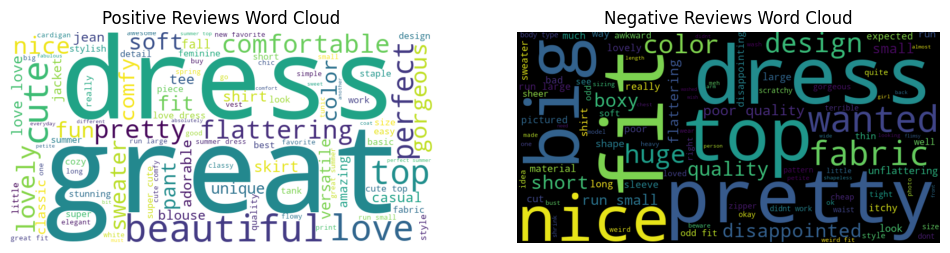

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define words commonly used in positive and negative reviews
positive_words = {"good", "great", "love", "amazing", "perfect", "beautiful", "cute", "best", "comfortable"}
negative_words = {"bad", "poor", "worst", "disappointed", "uncomfortable", "cheap", "not", "wrong", "issues"}

# Function to remove sentiment-related words from word clouds
def clean_text_for_wordcloud(text, remove_words):
    words = text.split()
    filtered_words = [word for word in words if word not in remove_words]
    return " ".join(filtered_words)

# Process text for word clouds
positive_reviews = df[y == 1]['Title'].dropna().apply(lambda x: clean_text_for_wordcloud(x, negative_words))
negative_reviews = df[y == 0]['Title'].dropna().apply(lambda x: clean_text_for_wordcloud(x, positive_words))

# Generate word clouds with max_words to balance word usage
positive_wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(" ".join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", max_words=100).generate(" ".join(negative_reviews))

# Plot Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


## 📊 **Confusion Matrices for Model Evaluation**  

### **📌 What’s Happening in This Code?**  

1. **Making Predictions:**  
   - Uses trained **Logistic Regression, SVM, and Random Forest** models.  
   - Predicts **sentiments (positive = 1, negative = 0)** on the test set.  

2. **Generating Confusion Matrices:**  
   - **Visualizes classification performance** for each model.  
   - Displays **true positives, true negatives, false positives, and false negatives**.  

3. **Displaying Results:**  
   - Plots **three confusion matrices** for direct comparison.  
   - Helps **analyze misclassification trends** across models.  

### **🎯 Why This Matters?**  
✅ **Identifies misclassification patterns** (e.g., false negatives).  
✅ **Compares model strengths** in handling customer reviews.  
✅ **Helps decide which model performs best for sentiment analysis.**  


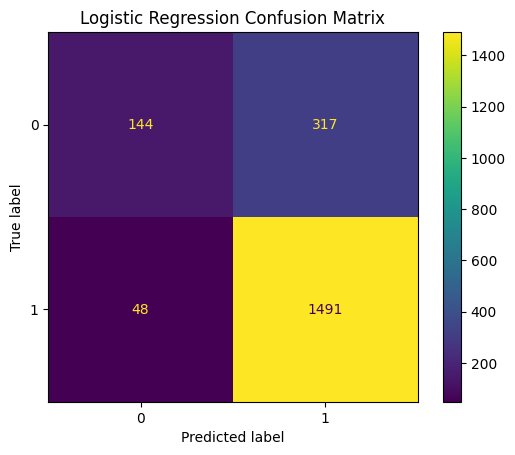

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate predictions for each model
y_pred_lr = lr_model.predict(X_test)
# Plot Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title('Logistic Regression Confusion Matrix')
plt.show()



## 📊 **Distribution of Ratings**  

### **📌 What’s Happening in This Code?**  

1. **Creating a Histogram:**  
   - Uses `seaborn.histplot()` to visualize the **distribution of ratings (1-5)**.  
   - `bins=5` ensures each rating (1 to 5) is distinctly represented.  
   - `kde=True` overlays a **Kernel Density Estimate (KDE) curve** to show the smooth distribution.  

2. **Styling the Plot:**  
   - **Blue-colored bars** for clarity.  
   - **Title and axis labels** added for better readability.  

3. **Interpreting the Chart:**  
   - Shows how ratings are **distributed across reviews**.  
   - If there’s a peak at **5-star ratings**, most reviews are positive.  
   - A **skewed distribution** could indicate biased feedback.  

### **🎯 Why This Matters?**  
✅ **Identifies trends** in customer feedback.  
✅ **Highlights potential rating biases** (e.g., mostly positive or negative).  
✅ **Useful for understanding sentiment skewness** before model training.  


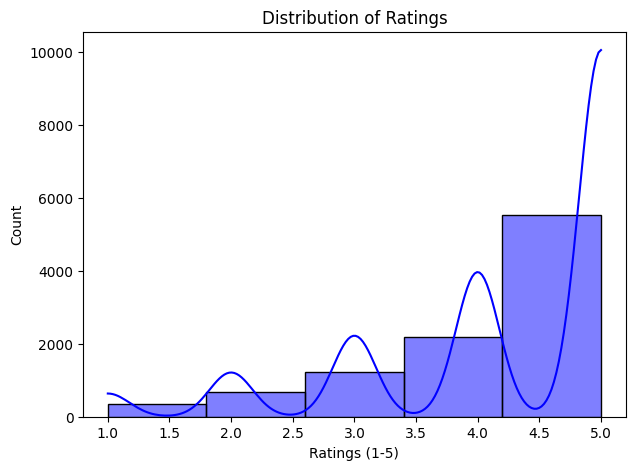

In [148]:
plt.figure(figsize=(7, 5))
sns.histplot(df["Rating"], bins=5, kde=True, color="blue")
plt.title("Distribution of Ratings")
plt.xlabel("Ratings (1-5)")
plt.ylabel("Count")
plt.show()


## 📝 **Enhanced Text Preprocessing with Negation Handling**  

### **📌 What’s Happening in This Code?**  

1. **Imports & Initialization:**  
   - Uses **NLTK’s stopwords and WordNetLemmatizer** for text normalization.  
   - Defines a set of **negation words** (e.g., "not", "never", "isn't") to improve sentiment preservation.  

2. **Preprocessing Steps:**  
   - **Converts text to lowercase** for uniformity.  
   - **Removes punctuation** using regex (`re.sub(r'[^\w\s]', '', text)`).  
   - **Handles negations** by combining negation words with the next word (e.g., `"not good"` → `"not_good"`).  
   - **Removes stopwords** to keep only meaningful words.  
   - **Applies lemmatization** to convert words to their base form (e.g., "running" → "run").  

3. **Applying the Function:**  
   - The cleaned and processed text is stored in a new column, **`cleaned_review`**.  

### **🎯 Why This Matters?**  
✅ **Preserves negation impact** on sentiment (avoids "not good" turning into "good").  
✅ **Improves model accuracy** by removing unnecessary words.  
✅ **Enhances text representation** for **TF-IDF or NLP models**.  


In [149]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Handle negations
negation_words = {"not", "no", "never", "isn't", "wasn't", "don't", "doesn't"}

def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        words = text.split()
        
        processed_words = []
        i = 0
        while i < len(words):
            if words[i] in negation_words and i + 1 < len(words):
                # Combine negation with the next word
                processed_words.append(words[i] + "_" + words[i + 1])  
                i += 1  # Skip next word since it's combined
            else:
                processed_words.append(words[i])
            i += 1
        
        text = ' '.join([lemmatizer.lemmatize(word) for word in processed_words if word not in stop_words])
    return text

# Apply preprocessing
df['cleaned_review'] = df['Title'].apply(preprocess_text)  


## 📊 **Most Reviewed Departments Visualization**  

### **📌 What’s Happening in This Code?**  

1. **Creating a Count Plot:**  
   - Uses `sns.countplot()` to **visualize department-wise review counts**.  
   - Orders departments by **most reviewed first** (`order=df["Department Name"].value_counts().index`).  
   - Uses a **"coolwarm"** color palette for contrast.  

2. **Plot Customization:**  
   - **Figure size** is set to `(10,5)` for better readability.  
   - Adds **title and axis labels** for clarity.  

### **🎯 Why This Matters?**  
✅ **Identifies top-reviewed departments** in the dataset.  
✅ Helps analyze **which product categories receive the most feedback**.  
✅ Can reveal **customer engagement trends** in different departments.  


C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\2171245342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Department Name"], order=df["Department Name"].value_counts().index, palette="coolwarm")


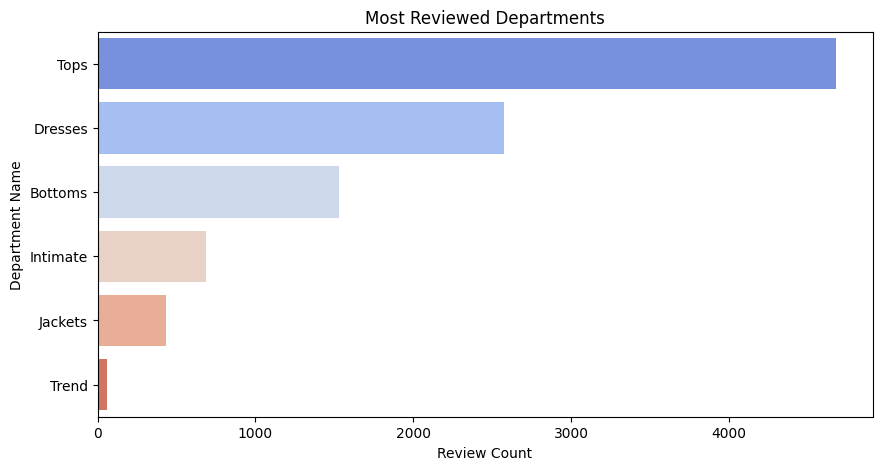

In [150]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Department Name"], order=df["Department Name"].value_counts().index, palette="coolwarm")
plt.title("Most Reviewed Departments")
plt.xlabel("Review Count")
plt.ylabel("Department Name")
plt.show()


## 📊 **Average Rating per Department**  

### **📌 What’s Happening in This Code?**  

1. **Calculating Average Ratings:**  
   - Groups data by `Department Name`.  
   - Computes the **mean rating** for each department (`df.groupby("Department Name")["Rating"].mean()`).  

2. **Creating a Bar Plot:**  
   - `sns.barplot()` plots **departments vs. their average rating**.  
   - Uses a **coolwarm color palette** for visual contrast.  

3. **Plot Customization:**  
   - **Figure size** is set to `(10,5)` for better readability.  
   - Adds **title and axis labels** for clarity.  

### **🎯 Why This Matters?**  
✅ Highlights **departments with the highest & lowest ratings**.  
✅ Helps understand **which product categories perform well or poorly**.  
✅ Useful for **business insights & product improvement strategies**.  


C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\4185222320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.groupby("Department Name")["Rating"].mean().index, x=df.groupby("Department Name")["Rating"].mean().values, palette="coolwarm")


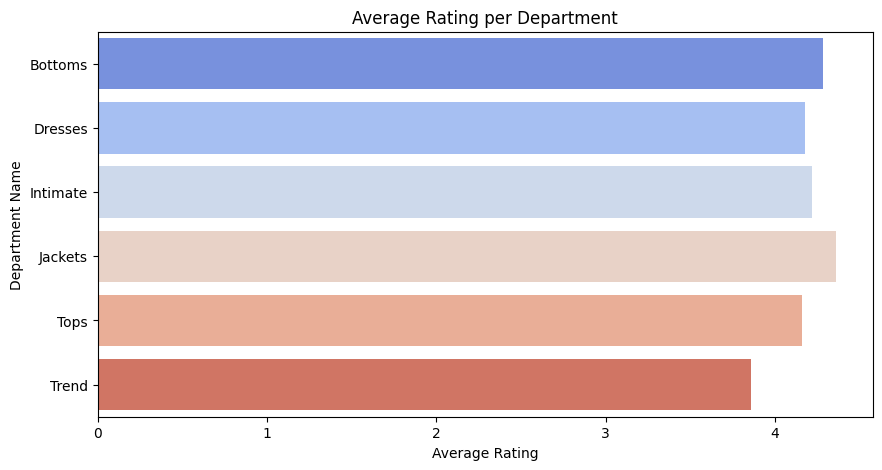

In [151]:
plt.figure(figsize=(10, 5))
sns.barplot(y=df.groupby("Department Name")["Rating"].mean().index, x=df.groupby("Department Name")["Rating"].mean().values, palette="coolwarm")
plt.title("Average Rating per Department")
plt.xlabel("Average Rating")
plt.ylabel("Department Name")
plt.show()



## 📈 **Rating Trends by Age**  

### **📌 What’s Happening in This Code?**  

1. **Visualizing Rating Trends Across Age Groups:**  
   - `sns.lineplot()` plots **Age vs. Rating** to observe trends.  
   - Uses `marker="o"` to emphasize data points.  

2. **Custom Styling:**  
   - **Color = Purple** for distinct visualization.  
   - **Figure size (10,5)** ensures clear readability.  
   - Adds **title and axis labels** for context.  

### **🎯 Why This Matters?**  
✅ Helps understand **how customer ratings vary by age**.  
✅ Identifies **age groups that give higher/lower ratings**.  
✅ Useful for **targeted marketing and product design**.  


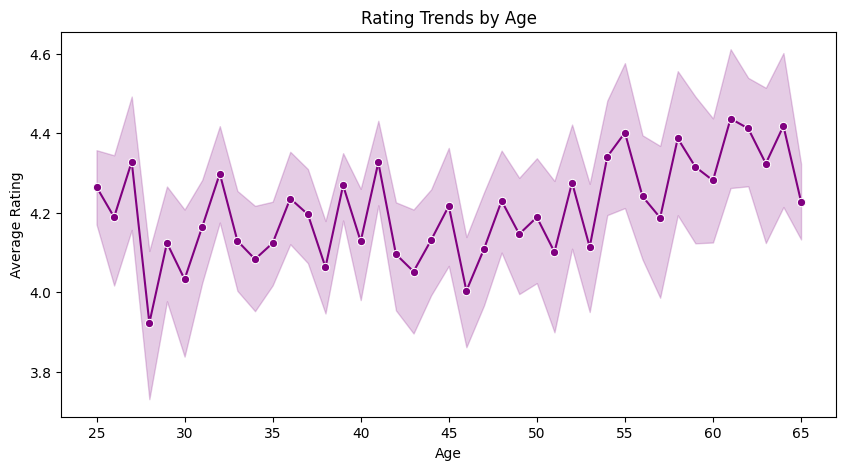

In [152]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Age"], y=df["Rating"], color="purple", marker="o")
plt.title("Rating Trends by Age")
plt.xlabel("Age")
plt.ylabel("Average Rating")
plt.show()


## 📌 **Splitting Dataset into Positive and Negative Reviews**  

### **🔹 What’s Happening in This Code?**  
1. **Dividing Reviews Based on Ratings:**
   - **Positive Reviews (`df_positive`)** → Includes ratings **4 & 5**.
   - **Negative Reviews (`df_negative`)** → Includes ratings **3, 2, & 1**.

2. **Why Split Reviews?**  
   - Helps in **sentiment analysis** by categorizing reviews into **clear positive and negative groups**.
   - Useful for **visualizations, word clouds, and model training**.
   - Allows deeper insights into **patterns within positive vs. negative sentiments**.

### **🎯 Key Takeaways:**  
✅ Helps in **analyzing sentiment distributions**.  
✅ Improves **text preprocessing & classification**.  
✅ Supports **model training for sentiment prediction**.


In [153]:
# Splitting the dataset into positive and negative reviews
df_positive = df[df['Rating'] > 3]  # Ratings 4 & 5
df_negative = df[df['Rating'] <= 3]  # Ratings 3, 2, 1


## 📊 **Sentiment Distribution: Positive vs. Negative Reviews**  

### **🔹 What’s Happening in This Code?**  
1. **Creating a Count Plot:**
   - Displays the distribution of **positive (1) vs. negative (0) reviews**.
   - Uses **red** for negative reviews and **green** for positive reviews.

2. **X-Axis Labels:**
   - `0` → **Negative reviews** (Ratings 1, 2, & 3).
   - `1` → **Positive reviews** (Ratings 4 & 5).

3. **Why Visualize This?**  
   - Helps understand **the balance of sentiments** in the dataset.
   - Useful for checking if the dataset is **skewed** towards one sentiment.

### **🎯 Key Takeaways:**  
✅ Provides a **clear sentiment distribution** overview.  
✅ Useful for **balancing the dataset** in machine learning models.  
✅ Highlights **potential biases** in the review dataset.


C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\798511882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=["red", "green"])


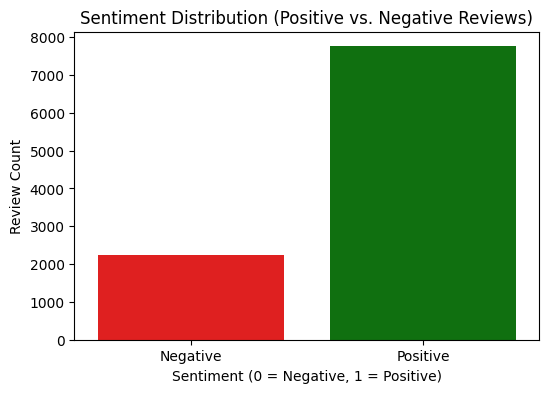

In [154]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette=["red", "green"])
plt.title("Sentiment Distribution (Positive vs. Negative Reviews)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Review Count")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.show()


## 📊 **Top Reviewed Departments: Positive vs. Negative Reviews**

### **🔹 What’s Happening in This Code?**  
1. **Extracting Top Departments**  
   - Finds **top 10 departments** with the highest number of **positive** and **negative** reviews separately.
   - Ensures only **common departments** (those appearing in both lists) are selected.

2. **Data Preprocessing**  
   - Filters **positive and negative reviews** to only include the top departments.
   - Creates a **DataFrame** to store:
     - `Department Name`
     - `Review Count`
     - `Sentiment` (Positive/Negative)

3. **Visualizing the Data**  
   - Uses **Seaborn's barplot** to display **positive (green) vs. negative (red)** reviews for each department.
   - Clearly shows **which departments receive more negative vs. positive feedback**.

### **🎯 Key Takeaways:**  
✅ Helps identify **departments with frequent reviews** (both good & bad).  
✅ Useful for **understanding customer satisfaction trends** per department.  
✅ Businesses can **focus on departments with high negative feedback** for improvements.  


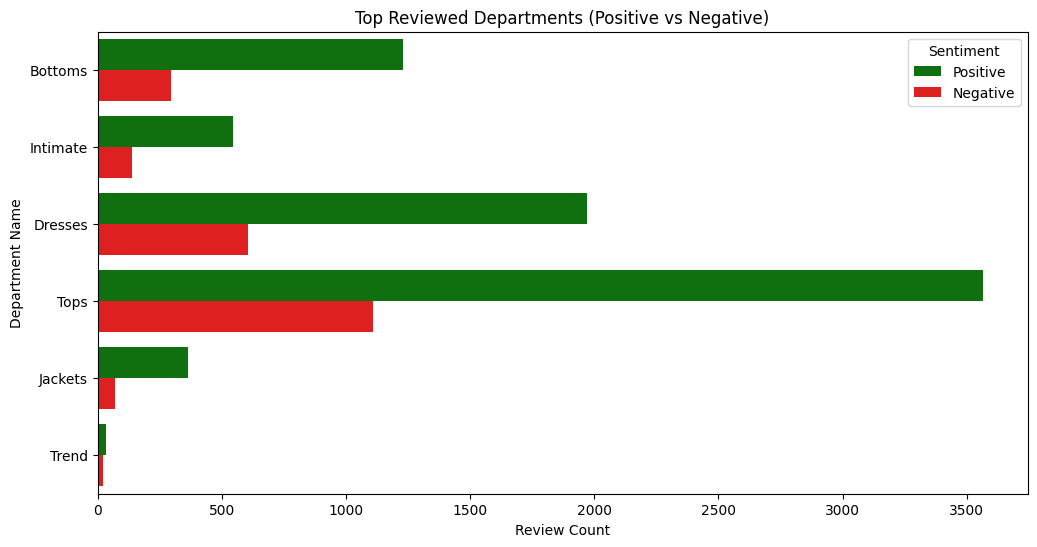

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most common 10 departments in positive and negative reviews separately
top_positive = df_positive["Department Name"].value_counts().nlargest(10)
top_negative = df_negative["Department Name"].value_counts().nlargest(10)

# Get only the departments that exist in both lists
common_departments = list(set(top_positive.index) & set(top_negative.index))[:10]  # Ensure max 10 categories

# Filter positive & negative reviews for only the common departments
top_positive = top_positive.loc[common_departments]
top_negative = top_negative.loc[common_departments]

# Create a combined DataFrame
df_top_departments = pd.DataFrame({
    "Department Name": common_departments * 2,
    "Review Count": list(top_positive) + list(top_negative),
    "Sentiment": ["Positive"] * len(top_positive) + ["Negative"] * len(top_negative)
})

plt.figure(figsize=(12, 6))

# Plot positive & negative reviews together
sns.barplot(
    data=df_top_departments,
    y="Department Name",
    x="Review Count",
    hue="Sentiment",
    palette={"Positive": "green", "Negative": "red"}
)

plt.title("Top Reviewed Departments (Positive vs Negative)")
plt.xlabel("Review Count")
plt.ylabel("Department Name")
plt.legend(title="Sentiment")
plt.show()


## 📈 **Age vs. Ratings Analysis (Positive vs. Negative Reviews)**  

### 🔍 **What Does This Visualization Show?**  
This code generates **two line plots** to examine how **age influences product ratings**, separately for **positive** and **negative** reviews.

### 🎨 **Breakdown of the Charts:**  
1. **Left Chart (Green Line) - Positive Ratings ✅**  
   - Displays how **average positive ratings** (ratings > 3) vary across different age groups.  
   - Uses **green markers** to represent data points.  

2. **Right Chart (Red Line) - Negative Ratings ❌**  
   - Shows the trend of **average negative ratings** (ratings ≤ 3) across age groups.  
   - Uses **red markers** to distinguish negative sentiment.

### 🎯 **Key Insights:**  
✅ Identifies **age groups that rate products highly vs. those that give low ratings**.  
✅ Helps detect **trends in customer satisfaction** based on age.  
✅ Can reveal if **younger or older consumers** are more likely to be dissatisfied.  

📌 **Business Application:**  
- **Targeted marketing:** If younger customers leave **more negative reviews**, companies may **refine products or messaging** for this demographic.  
- **Product improvements:** If older age groups consistently rate products **positively**, their preferences might guide **future designs**.  
- **Customer segmentation:** Businesses can tailor engagement strategies based on **age-related rating trends**.  


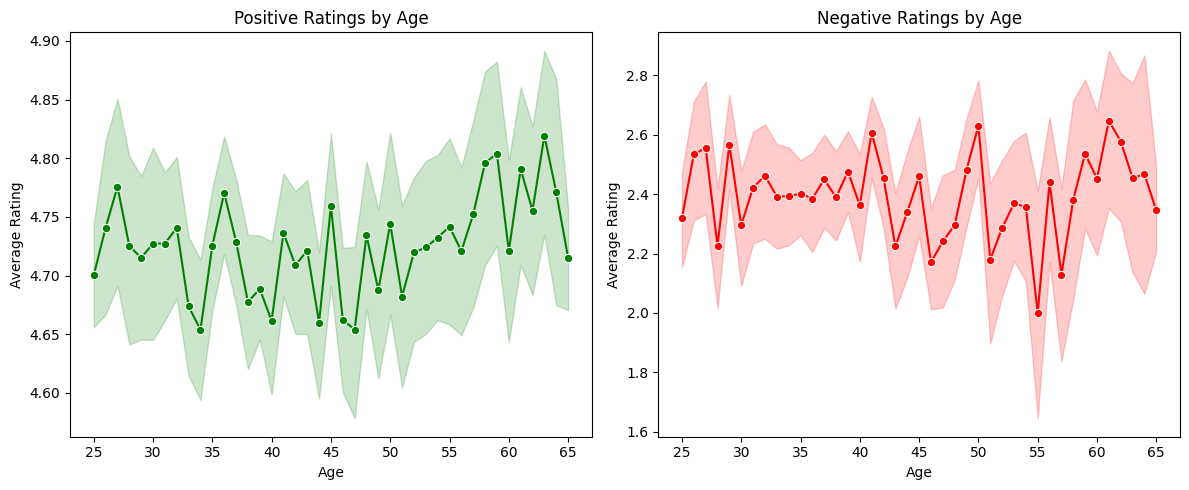

In [157]:
plt.figure(figsize=(12, 5))

# Positive Ratings
plt.subplot(1, 2, 1)
sns.lineplot(x=df_positive["Age"], y=df_positive["Rating"], color="green", marker="o")
plt.title("Positive Ratings by Age")
plt.xlabel("Age")
plt.ylabel("Average Rating")

# Negative Ratings
plt.subplot(1, 2, 2)
sns.lineplot(x=df_negative["Age"], y=df_negative["Rating"], color="red", marker="o")
plt.title("Negative Ratings by Age")
plt.xlabel("Age")
plt.ylabel("Average Rating")

plt.tight_layout()
plt.show()


## 📊 **Positive to Negative Review Ratios by Department**  
### 🔎 **What Does This Show?**  
This **bar chart** visualizes the **ratio of positive to negative reviews** for different **departments**.

### 🔵 **What is the Positive:Negative Ratio?**  
- A **higher ratio (>1)** means the department has **more positive reviews** than negative ones.  
- A **lower ratio (<1)** indicates **more negative reviews**, signaling potential **customer dissatisfaction**.  
- The **dashed vertical line at 1** represents a **neutral balance** (equal positive and negative reviews).

### 📌 **Key Insights:**  
- Which departments have the **highest positive sentiment**?  
- Are there departments with **low ratios**, requiring urgent attention?  
- Departments **close to 1** may have **polarizing opinions** and need further analysis.

### 🎯 **Business Applications:**  
- **Prioritize improvements** in departments with **low ratios** to address customer complaints.  
- **Boost marketing** for departments with **high positive ratios** to reinforce brand loyalty.  
- **Identify trends** in customer sentiment to improve **product offerings and customer satisfaction**.  


C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\1236241973.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


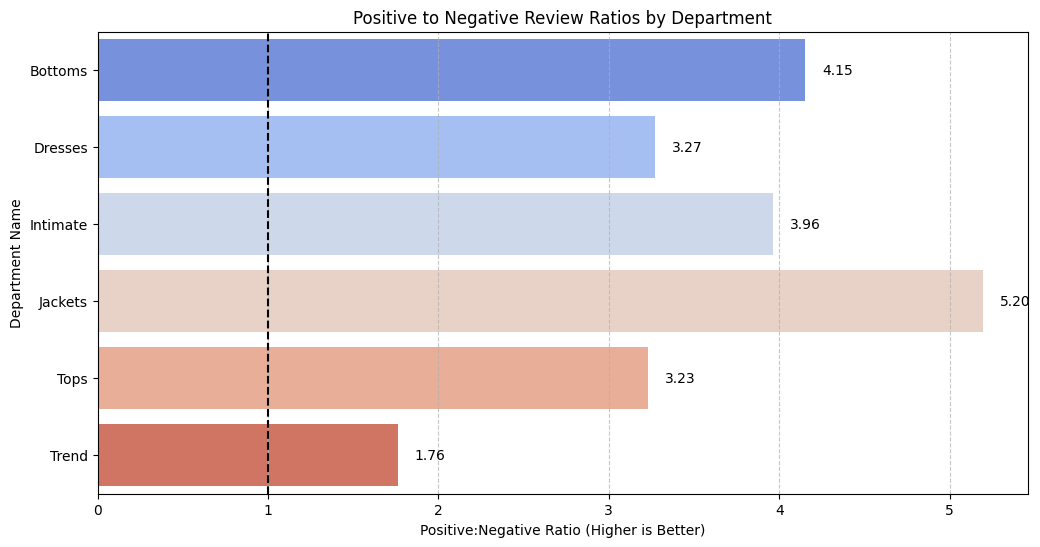

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\LAB_TASKS\Data_Science\project\Womens Clothing Reviews.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Define positive and negative sentiment based on 'Rating'
df["Sentiment"] = df["Rating"].apply(lambda x: "Positive" if x > 3 else "Negative")

# Group by department and count positive and negative reviews
df_ratios = df.groupby("Department Name")["Sentiment"].value_counts().unstack(fill_value=0)

# Calculate the positive-to-negative review ratio
df_ratios["Positive:Negative Ratio"] = df_ratios["Positive"] / df_ratios["Negative"]
df_ratios = df_ratios.reset_index()

# Visualization: Highlight departments with high negative review impact
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_ratios,
    x="Positive:Negative Ratio",
    y="Department Name",
    palette="coolwarm"
)

plt.axvline(x=1, color="black", linestyle="--", linewidth=1.5)  # Reference line at ratio = 1
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Grid lines for better readability
plt.title("Positive to Negative Review Ratios by Department")
plt.xlabel("Positive:Negative Ratio (Higher is Better)")
plt.ylabel("Department Name")

# Add value labels to bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', (width + 0.1, p.get_y() + p.get_height() / 2), ha="left", va="center", fontsize=10)

plt.show()
